In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
import csv
pose_data = pd.read_csv("cat_static (3).csv",encoding='utf-8')
pose_data=pose_data.dropna(axis=0,how='all')
print(pose_data)

           ax        ay        az   action
0    0.020264  0.405029 -0.927734    lying
1    0.014893  0.407227 -0.924683    lying
2    0.016602  0.407837 -0.924316    lying
3    0.017822  0.406616 -0.927002    lying
4    0.015259  0.407349 -0.927246    lying
..        ...       ...       ...      ...
695  0.798218  0.222290 -0.590576  seating
696  0.826904  0.221191 -0.573975  seating
697  0.820557  0.215576 -0.507202  seating
698  0.760376  0.262939 -0.508179  seating
699  0.810913  0.269165 -0.573853  seating

[700 rows x 4 columns]


In [3]:
df = pd.DataFrame(data= pose_data,
                     columns= ['action','ax','ay','az'])
df

,action,ax,ay,az
0,lying,0.020264,0.405029,-0.927734
1,lying,0.014893,0.407227,-0.924683
2,lying,0.016602,0.407837,-0.924316
3,lying,0.017822,0.406616,-0.927002
4,lying,0.015259,0.407349,-0.927246
...,...,...,...,...
695,seating,0.798218,0.222290,-0.590576
696,seating,0.826904,0.221191,-0.573975
697,seating,0.820557,0.215576,-0.507202
698,seating,0.760376,0.262939,-0.508179


In [4]:
df.shape

(700, 4)

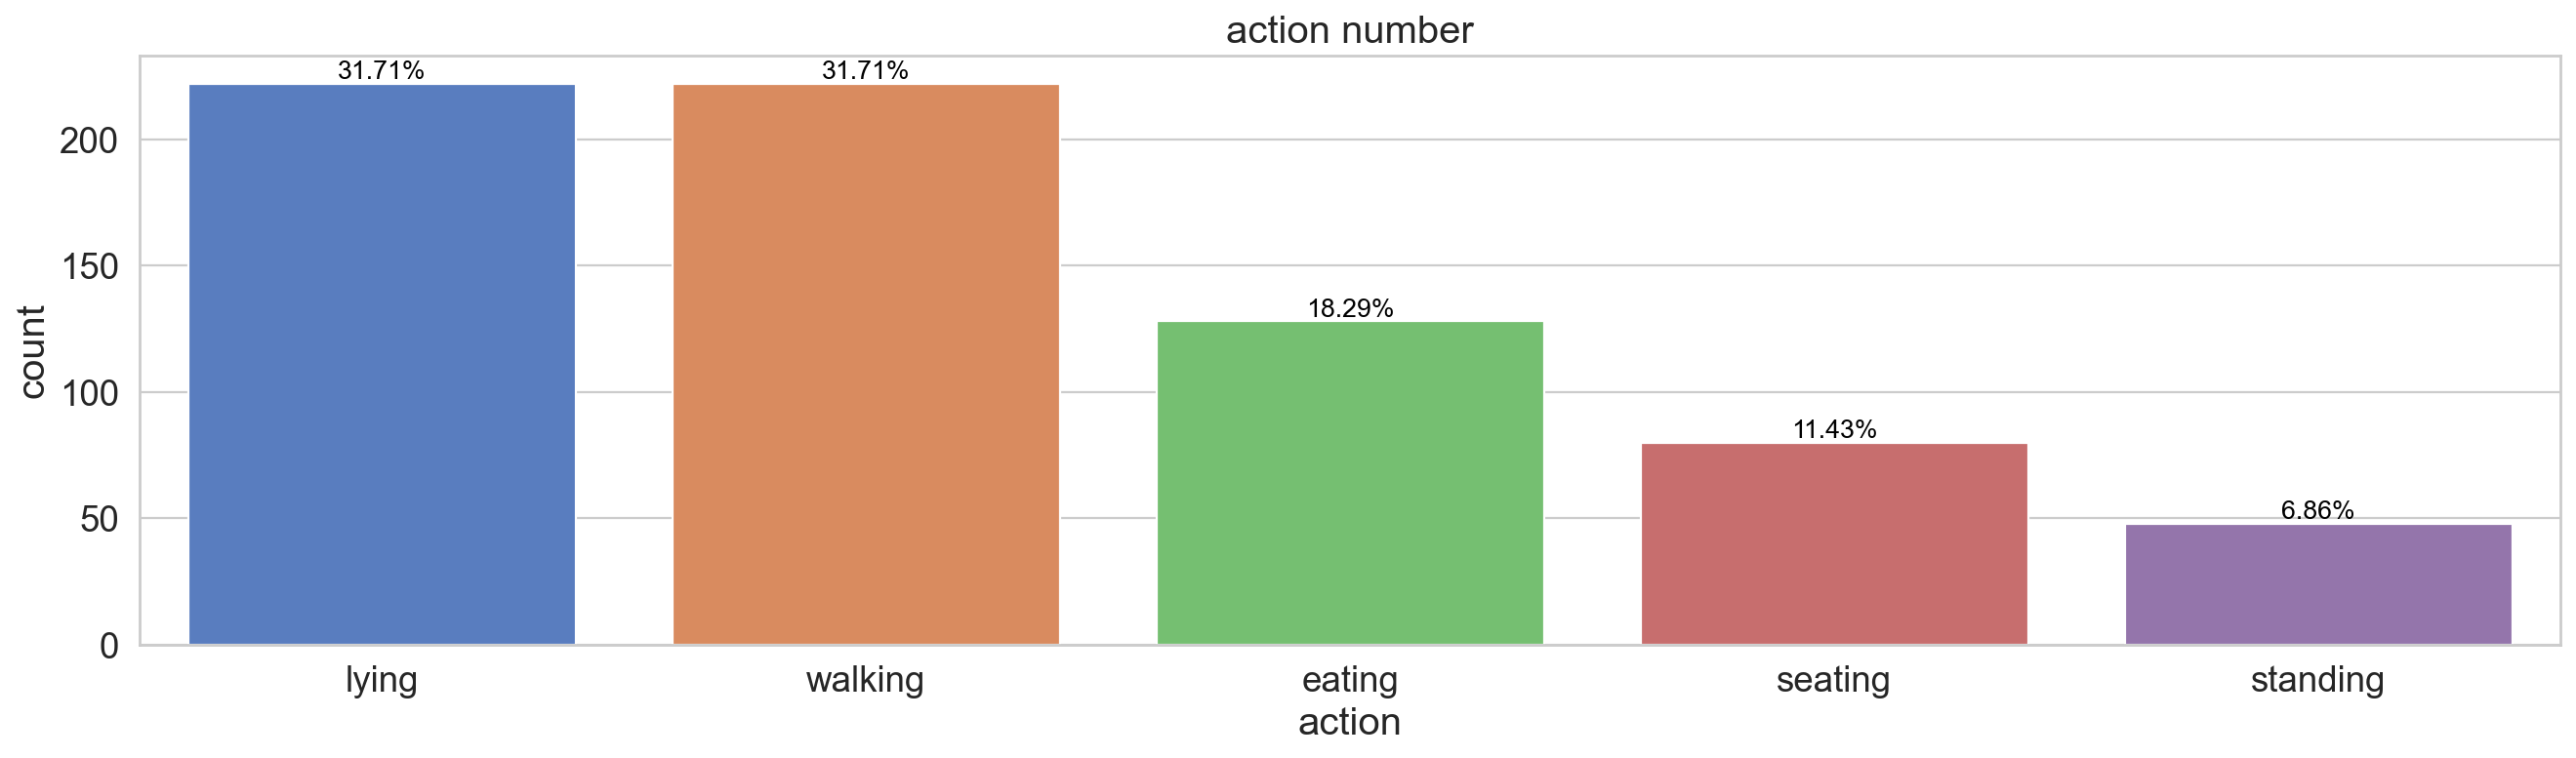

In [8]:
fig,ax = plt.subplots(figsize=(20,5), dpi=80)
ax.set_title("action number")
sns.countplot(x = 'action',
              data = df,
              order = df.action.value_counts().index);
for p in ax.patches:
    height = p.get_height()
    total = sum(df['action'].value_counts())  # 計算總數
    percentage = (height / total) * 100  # 計算百分比
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=12, color='black')
plt.show()

In [6]:
def plot_activity(action, df):
    data = df[df['action'] == action][['ax', 'ay', 'az']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=action)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

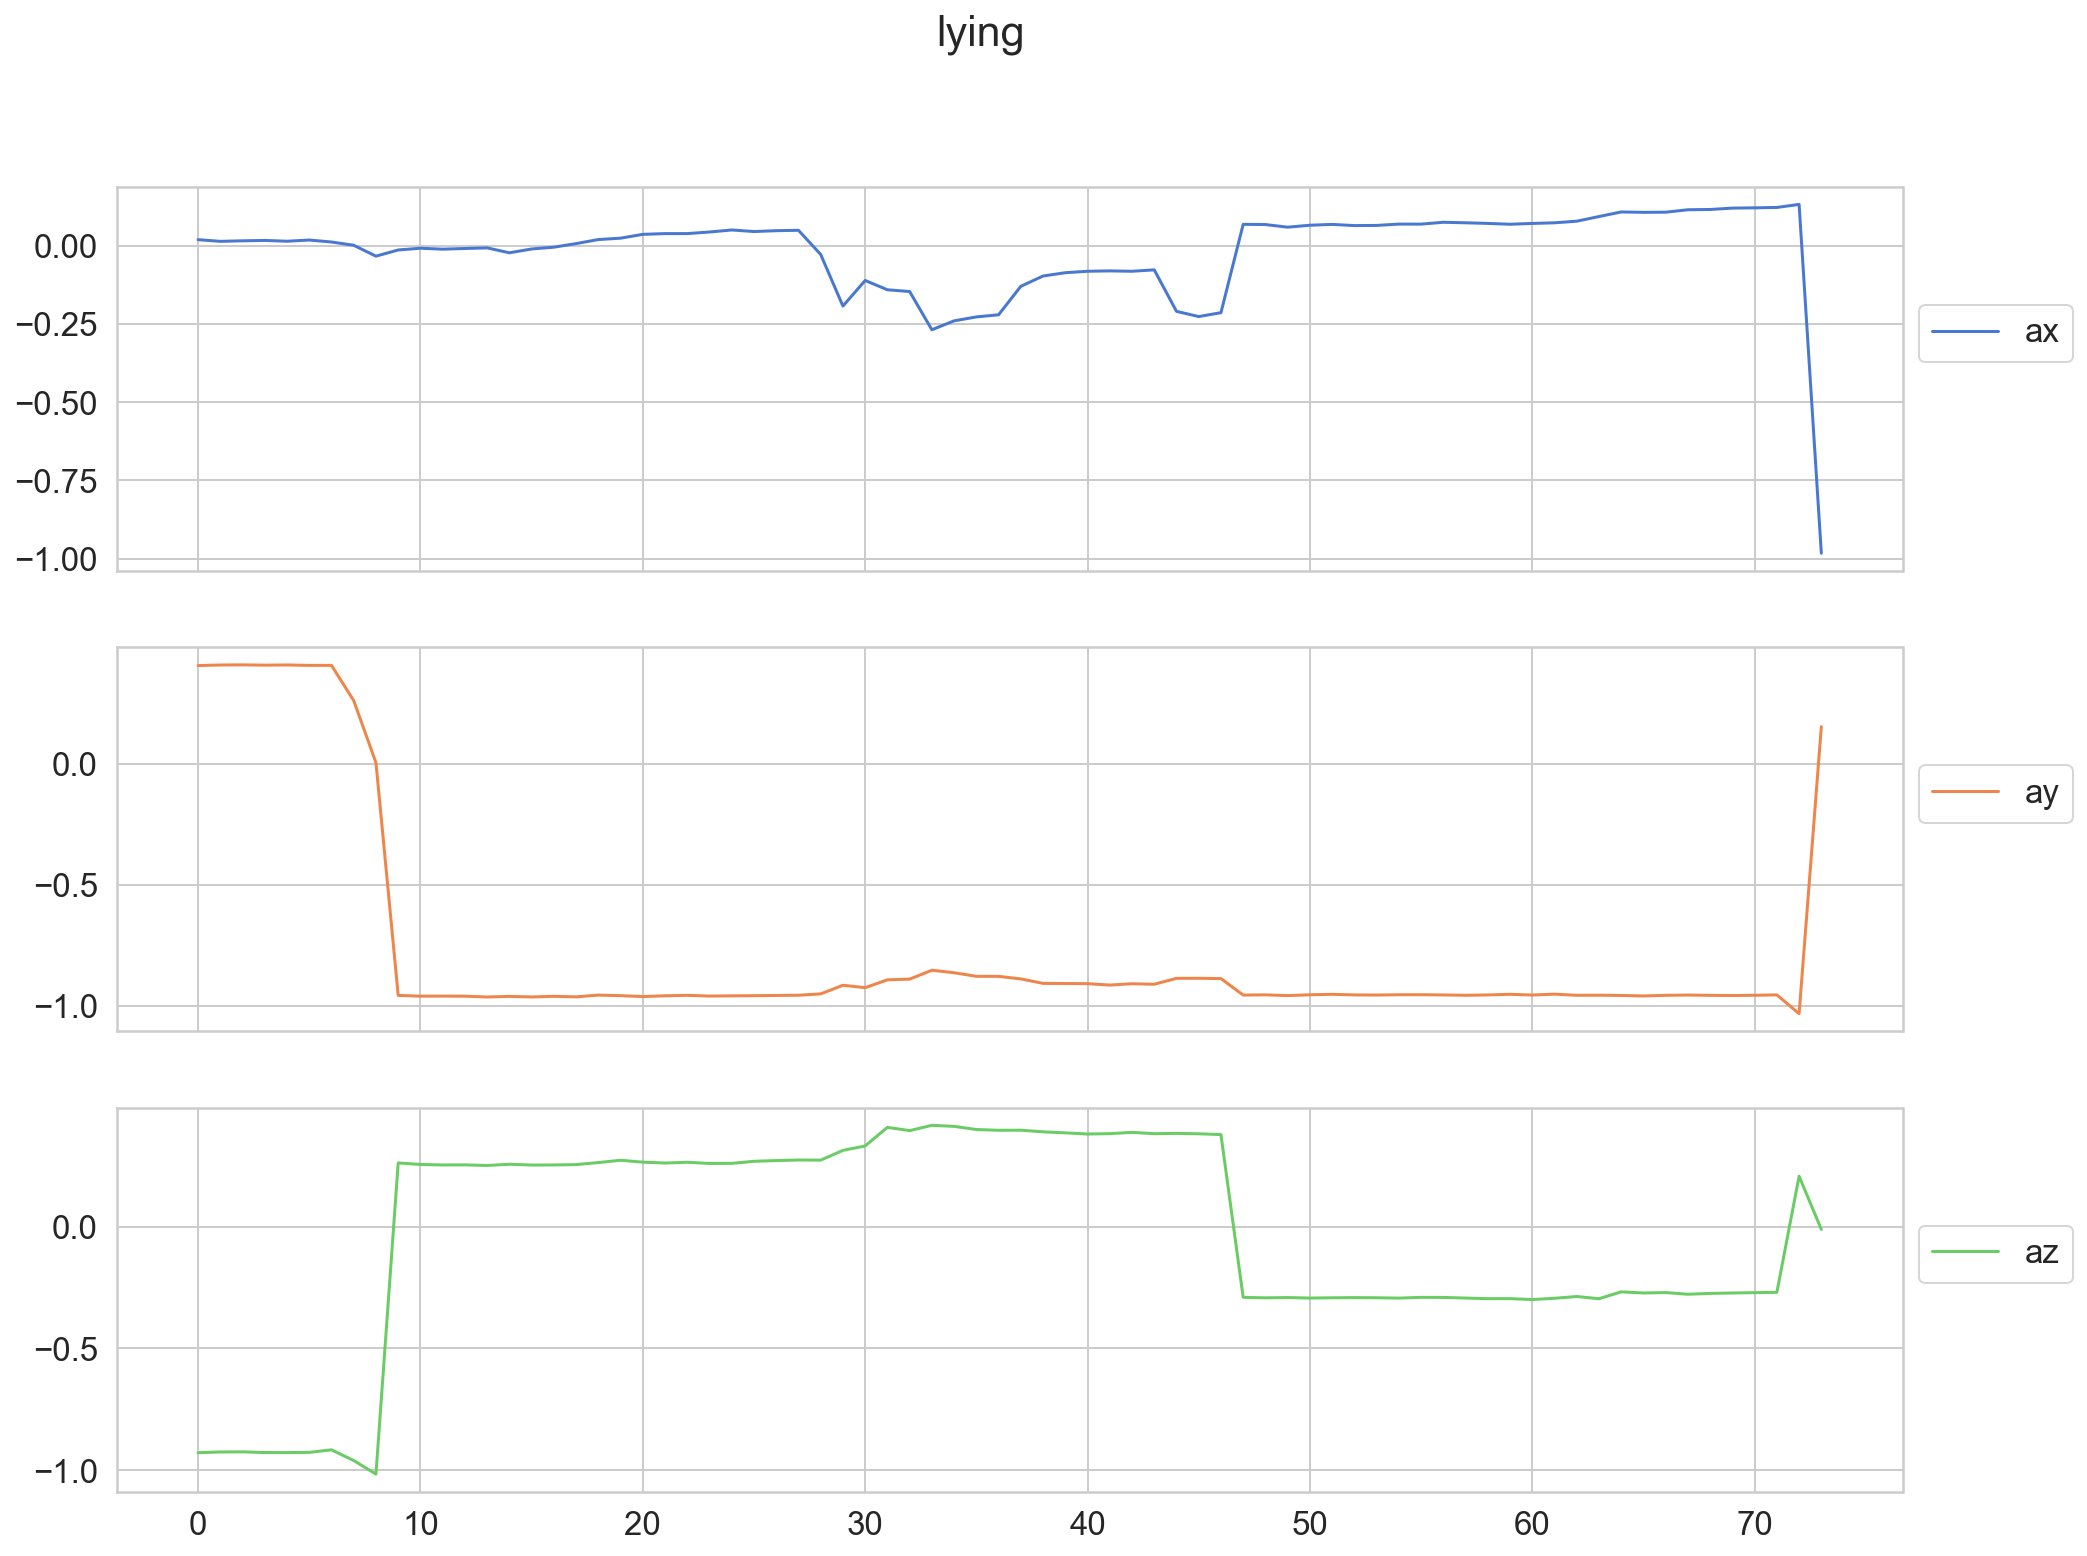

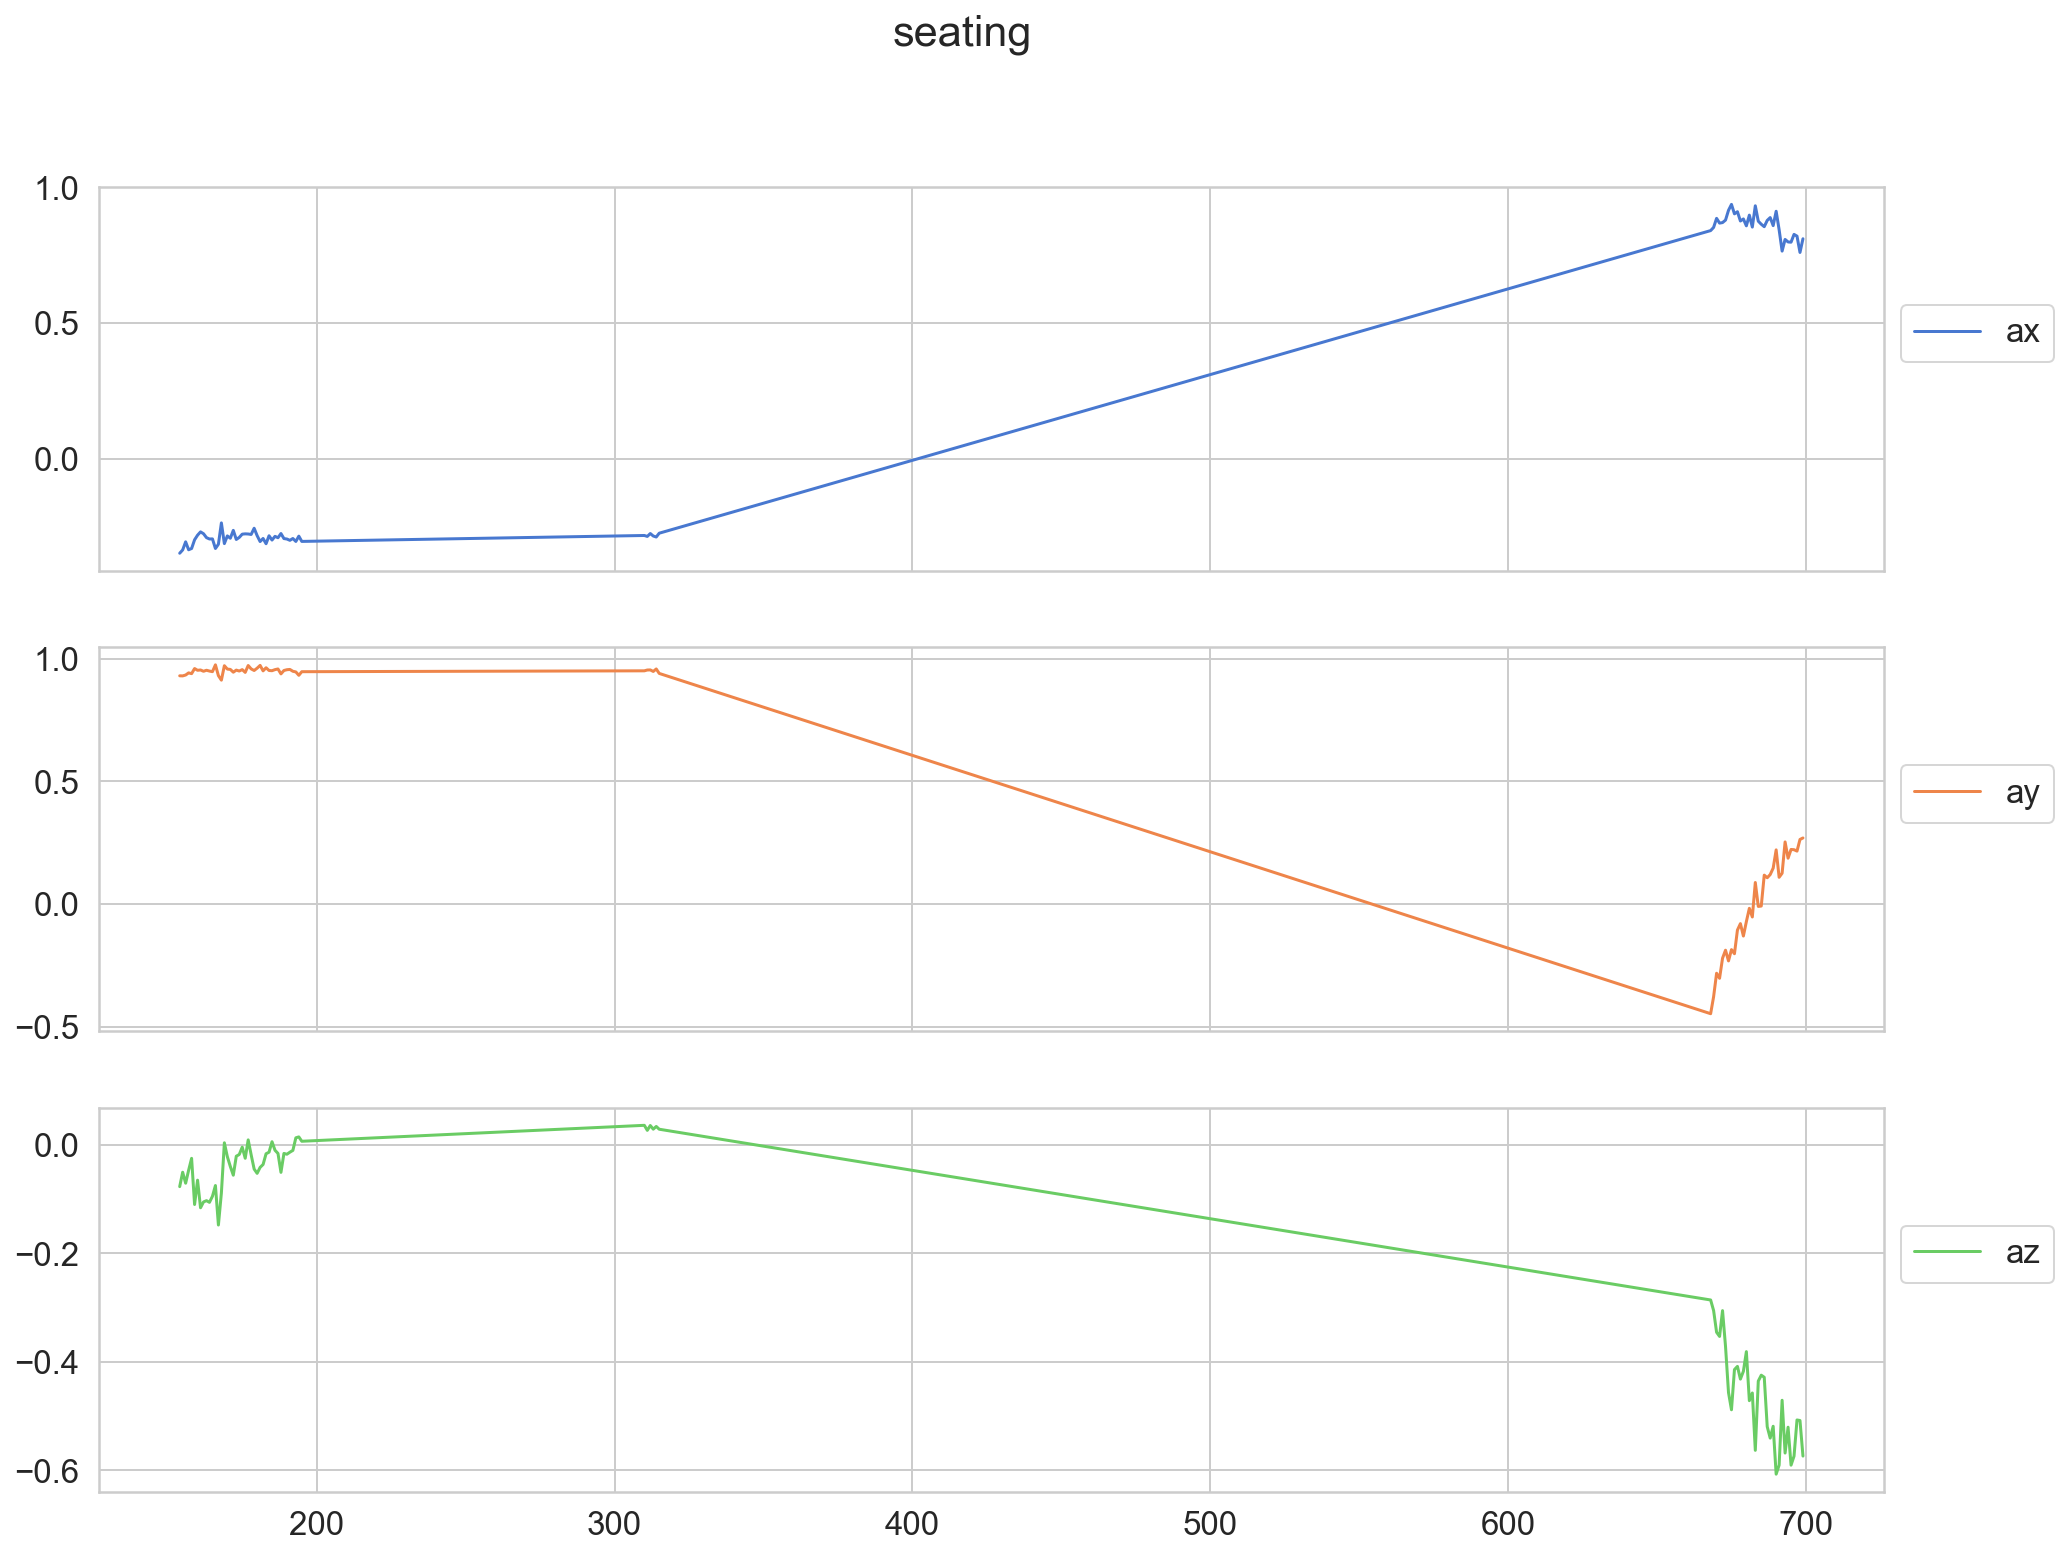

In [7]:
plot_activity("lying", df);
plot_activity("seating", df);

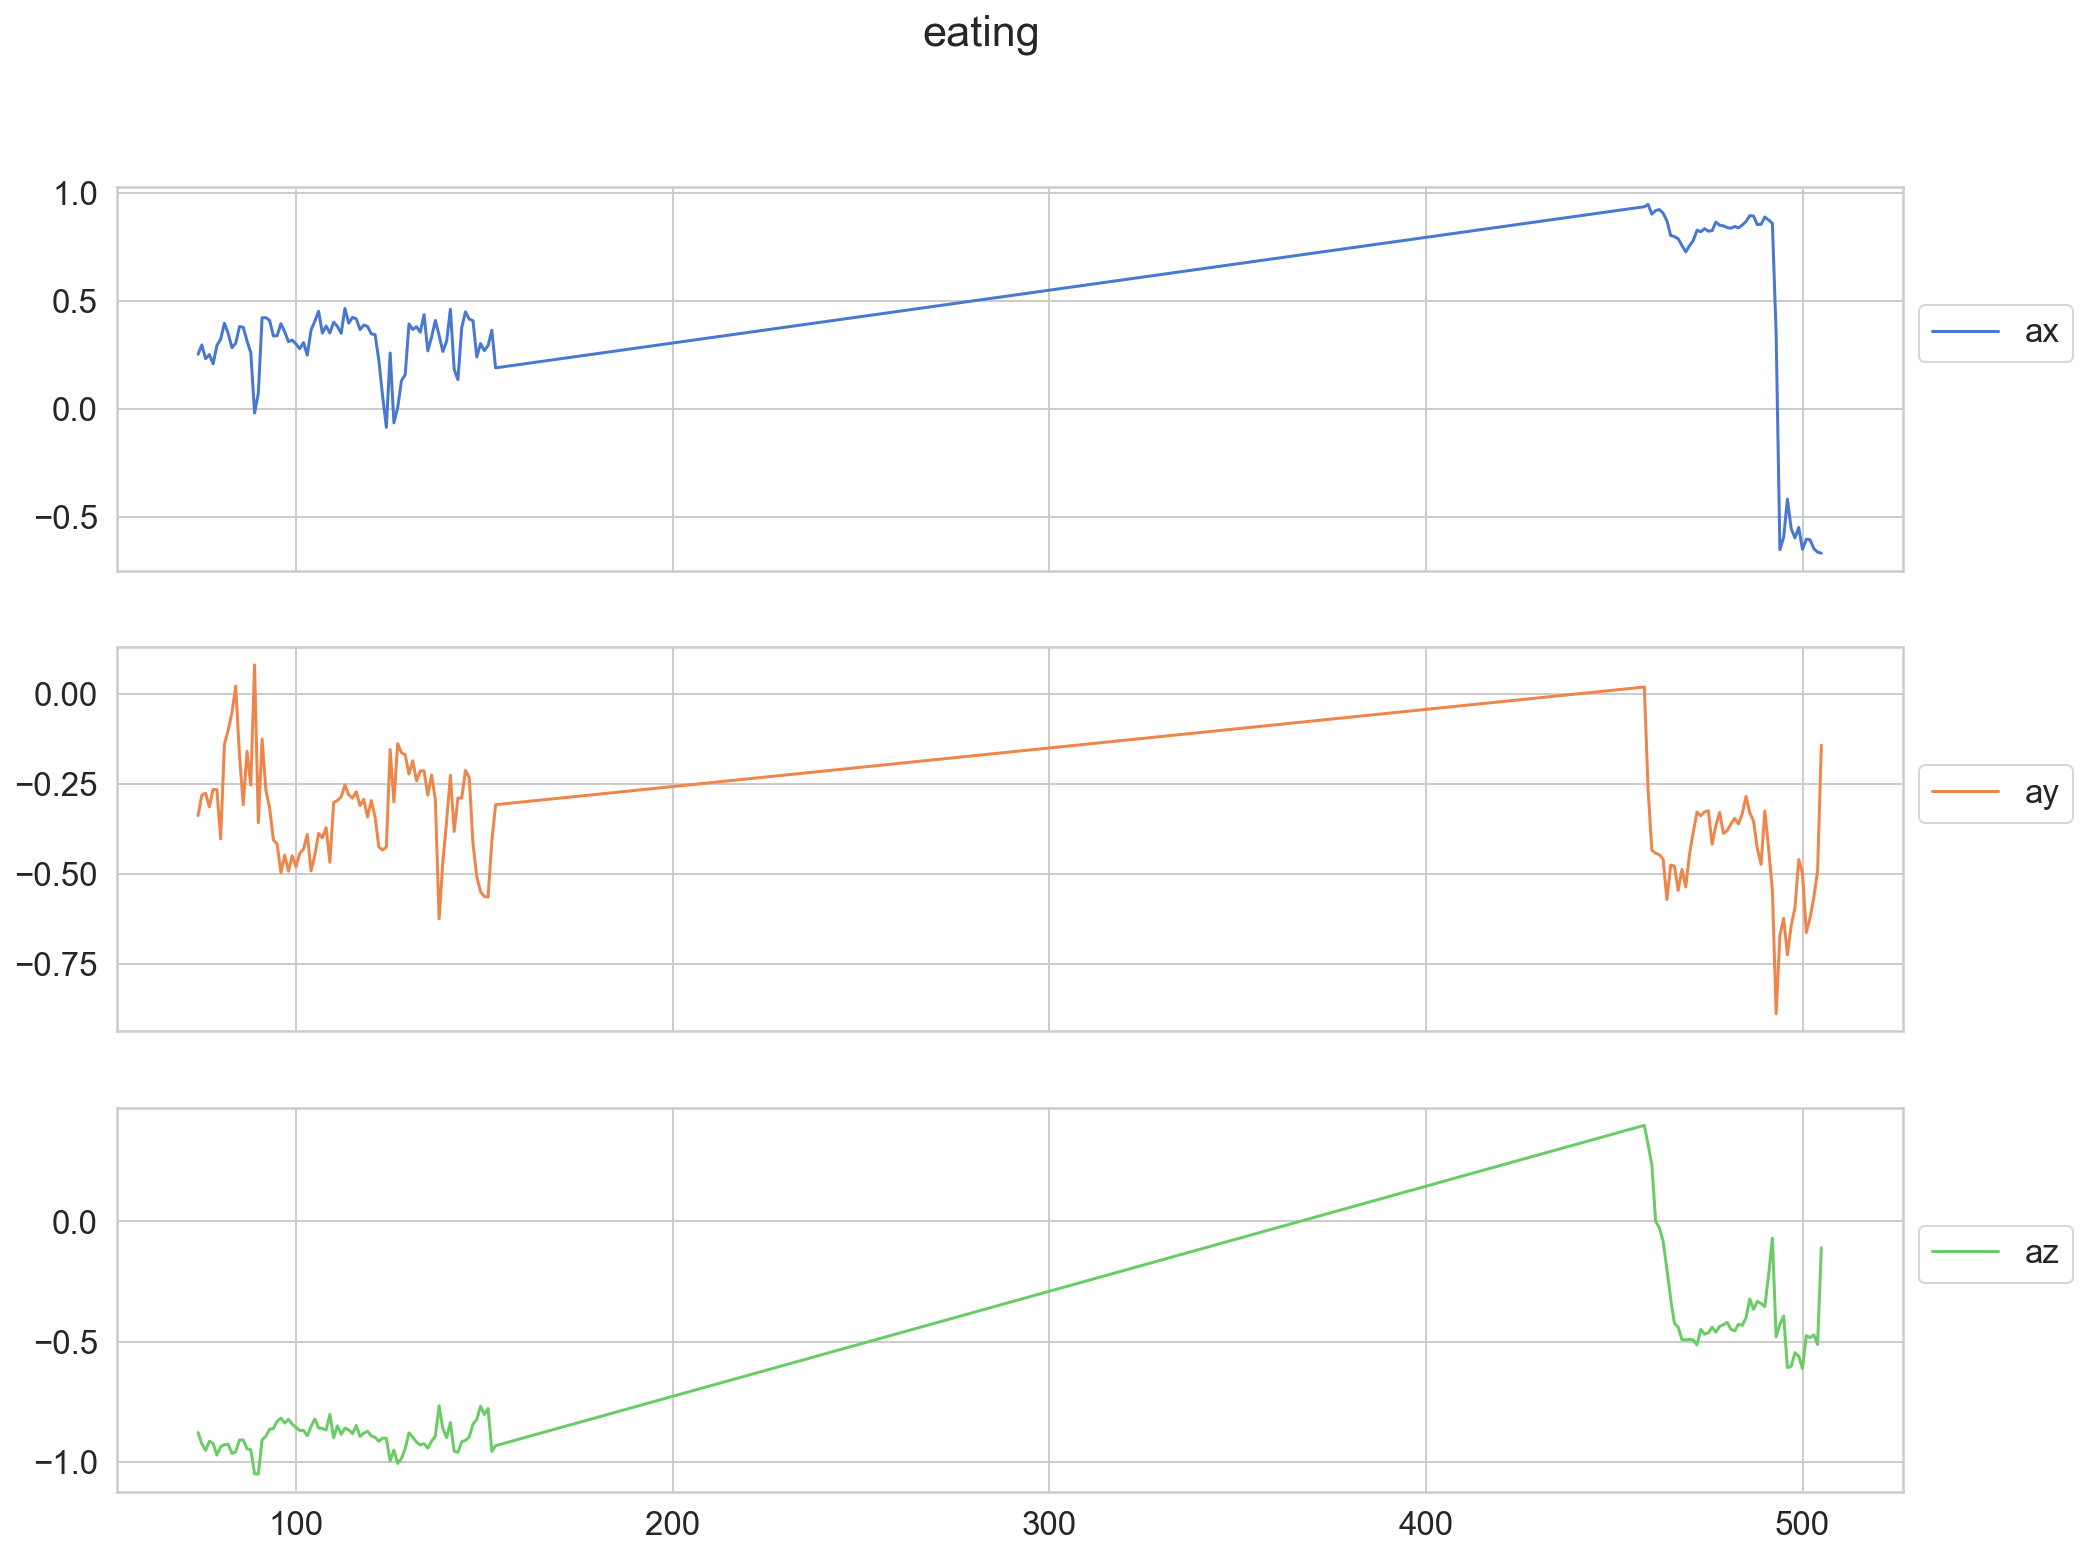

In [8]:
plot_activity("eating", df);

In [9]:
import csv
poses_data = pd.read_csv("cat_static (3)_test.csv",encoding='utf-8')
poses_data=poses_data.dropna(axis=0,how='all')
print(poses_data)

          ax        ay        az   action
0   0.054443 -0.234009 -0.961304   eating
1   0.203247  0.168335 -0.925293   eating
2  -0.910522 -0.066772 -0.369507   eating
3  -0.314941  0.953369  0.008057  seating
4  -0.306641  0.949585  0.009033  seating
5  -0.297607  0.945923 -0.004761  seating
6  -0.382812  0.922852  0.092041  seating
7  -0.265869  0.516113 -0.847534     ping
8  -0.587402  0.772095 -0.180176     ping
9  -0.875732  0.663086  0.111938     ping
10 -0.689697  0.980957  0.095703     ping
11 -0.293823  0.652832  0.476318     ping
12 -0.117798  1.020386 -0.435059  walking
13 -0.541138  0.890747 -0.032227  walking
14 -0.401001  0.659424 -0.545410  walking
15 -0.258789  0.821533  0.141235  walking


In [10]:
dft = pd.DataFrame(data= poses_data,
                     columns= ['action','ax','ay','az'])
dft

,action,ax,ay,az
0,eating,0.054443,-0.234009,-0.961304
1,eating,0.203247,0.168335,-0.925293
2,eating,-0.910522,-0.066772,-0.369507
3,seating,-0.314941,0.953369,0.008057
4,seating,-0.306641,0.949585,0.009033
5,seating,-0.297607,0.945923,-0.004761
6,seating,-0.382812,0.922852,0.092041
7,ping,-0.265869,0.516113,-0.847534
8,ping,-0.587402,0.772095,-0.180176
9,ping,-0.875732,0.663086,0.111938


In [11]:
df_train = df
df_test = dft
df_train

,action,ax,ay,az
0,lying,0.020264,0.405029,-0.927734
1,lying,0.014893,0.407227,-0.924683
2,lying,0.016602,0.407837,-0.924316
3,lying,0.017822,0.406616,-0.927002
4,lying,0.015259,0.407349,-0.927246
...,...,...,...,...
695,seating,0.798218,0.222290,-0.590576
696,seating,0.826904,0.221191,-0.573975
697,seating,0.820557,0.215576,-0.507202
698,seating,0.760376,0.262939,-0.508179


In [12]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['ax', 'ay', 'az']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns].values)

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

In [13]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 5
STEP = 1

X_train, y_train = create_dataset(
    df_train[['ax', 'ay', 'az']], 
    df_train.action, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['ax', 'ay', 'az']], 
    df_test.action, 
    TIME_STEPS, 
    STEP
)

In [14]:
print(X_train.shape, y_train.shape)

(695, 5, 3) (695, 1)


In [15]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
print(X_train, y_train)

[[[-0.10020989  0.67705515 -0.61854019]
  [-0.10791824  0.6793933  -0.61567622]
  [-0.10546552  0.68004219 -0.61533172]
  [-0.1037146   0.67874334 -0.61785306]
  [-0.10739296  0.67952307 -0.6180821 ]]

 [[-0.10791824  0.6793933  -0.61567622]
  [-0.10546552  0.68004219 -0.61533172]
  [-0.1037146   0.67874334 -0.61785306]
  [-0.10739296  0.67952307 -0.6180821 ]
  [-0.10196225  0.67770511 -0.61728046]]

 [[-0.10546552  0.68004219 -0.61533172]
  [-0.1037146   0.67874334 -0.61785306]
  [-0.10739296  0.67952307 -0.6180821 ]
  [-0.10196225  0.67770511 -0.61728046]
  [-0.11089767  0.67783489 -0.60754055]]

 ...

 [[ 0.96916591  0.37956126 -0.18964149]
  [ 1.03083409  0.51525855 -0.28108175]
  [ 1.0175185   0.44474838 -0.23627873]
  [ 1.01629286  0.48266499 -0.30205129]
  [ 1.05746239  0.48149592 -0.28646799]]

 [[ 1.03083409  0.51525855 -0.28108175]
  [ 1.0175185   0.44474838 -0.23627873]
  [ 1.01629286  0.48266499 -0.30205129]
  [ 1.05746239  0.48149592 -0.28646799]
  [ 1.04835331  0.47552292

In [17]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=256, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.7))

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/40
10/10 [==============================] - 0s 36ms/step - loss: 0.3155 - acc: 0.8800 - val_loss: 8.8187 - val_acc: 0.2000
Epoch 2/40
10/10 [==============================] - 0s 34ms/step - loss: 0.2858 - acc: 0.8944 - val_loss: 8.9705 - val_acc: 0.2143
Epoch 3/40
10/10 [==============================] - 0s 34ms/step - loss: 0.2656 - acc: 0.9008 - val_loss: 9.8380 - val_acc: 0.2143
Epoch 4/40
10/10 [==============================] - 0s 37ms/step - loss: 0.2477 - acc: 0.9088 - val_loss: 10.0863 - val_acc: 0.2143
Epoch 5/40
10/10 [==============================] - 0s 34ms/step - loss: 0.2259 - acc: 0.9120 - val_loss: 11.0310 - val_acc: 0.2143
Epoch 6/40
10/10 [==============================] - 0s 34ms/step - loss: 0.2330 - acc: 0.9248 - val_loss: 12.0000 - val_acc: 0.2143
Epoch 7/40
10/10 [==============================] - 0s 34ms/step - loss: 0.2097 - acc: 0.9216 - val_loss: 12.6309 - val_acc: 0.2143
Epoch 8/40
10/10 [==============================] - 0s 37ms/step - loss: 0.1833

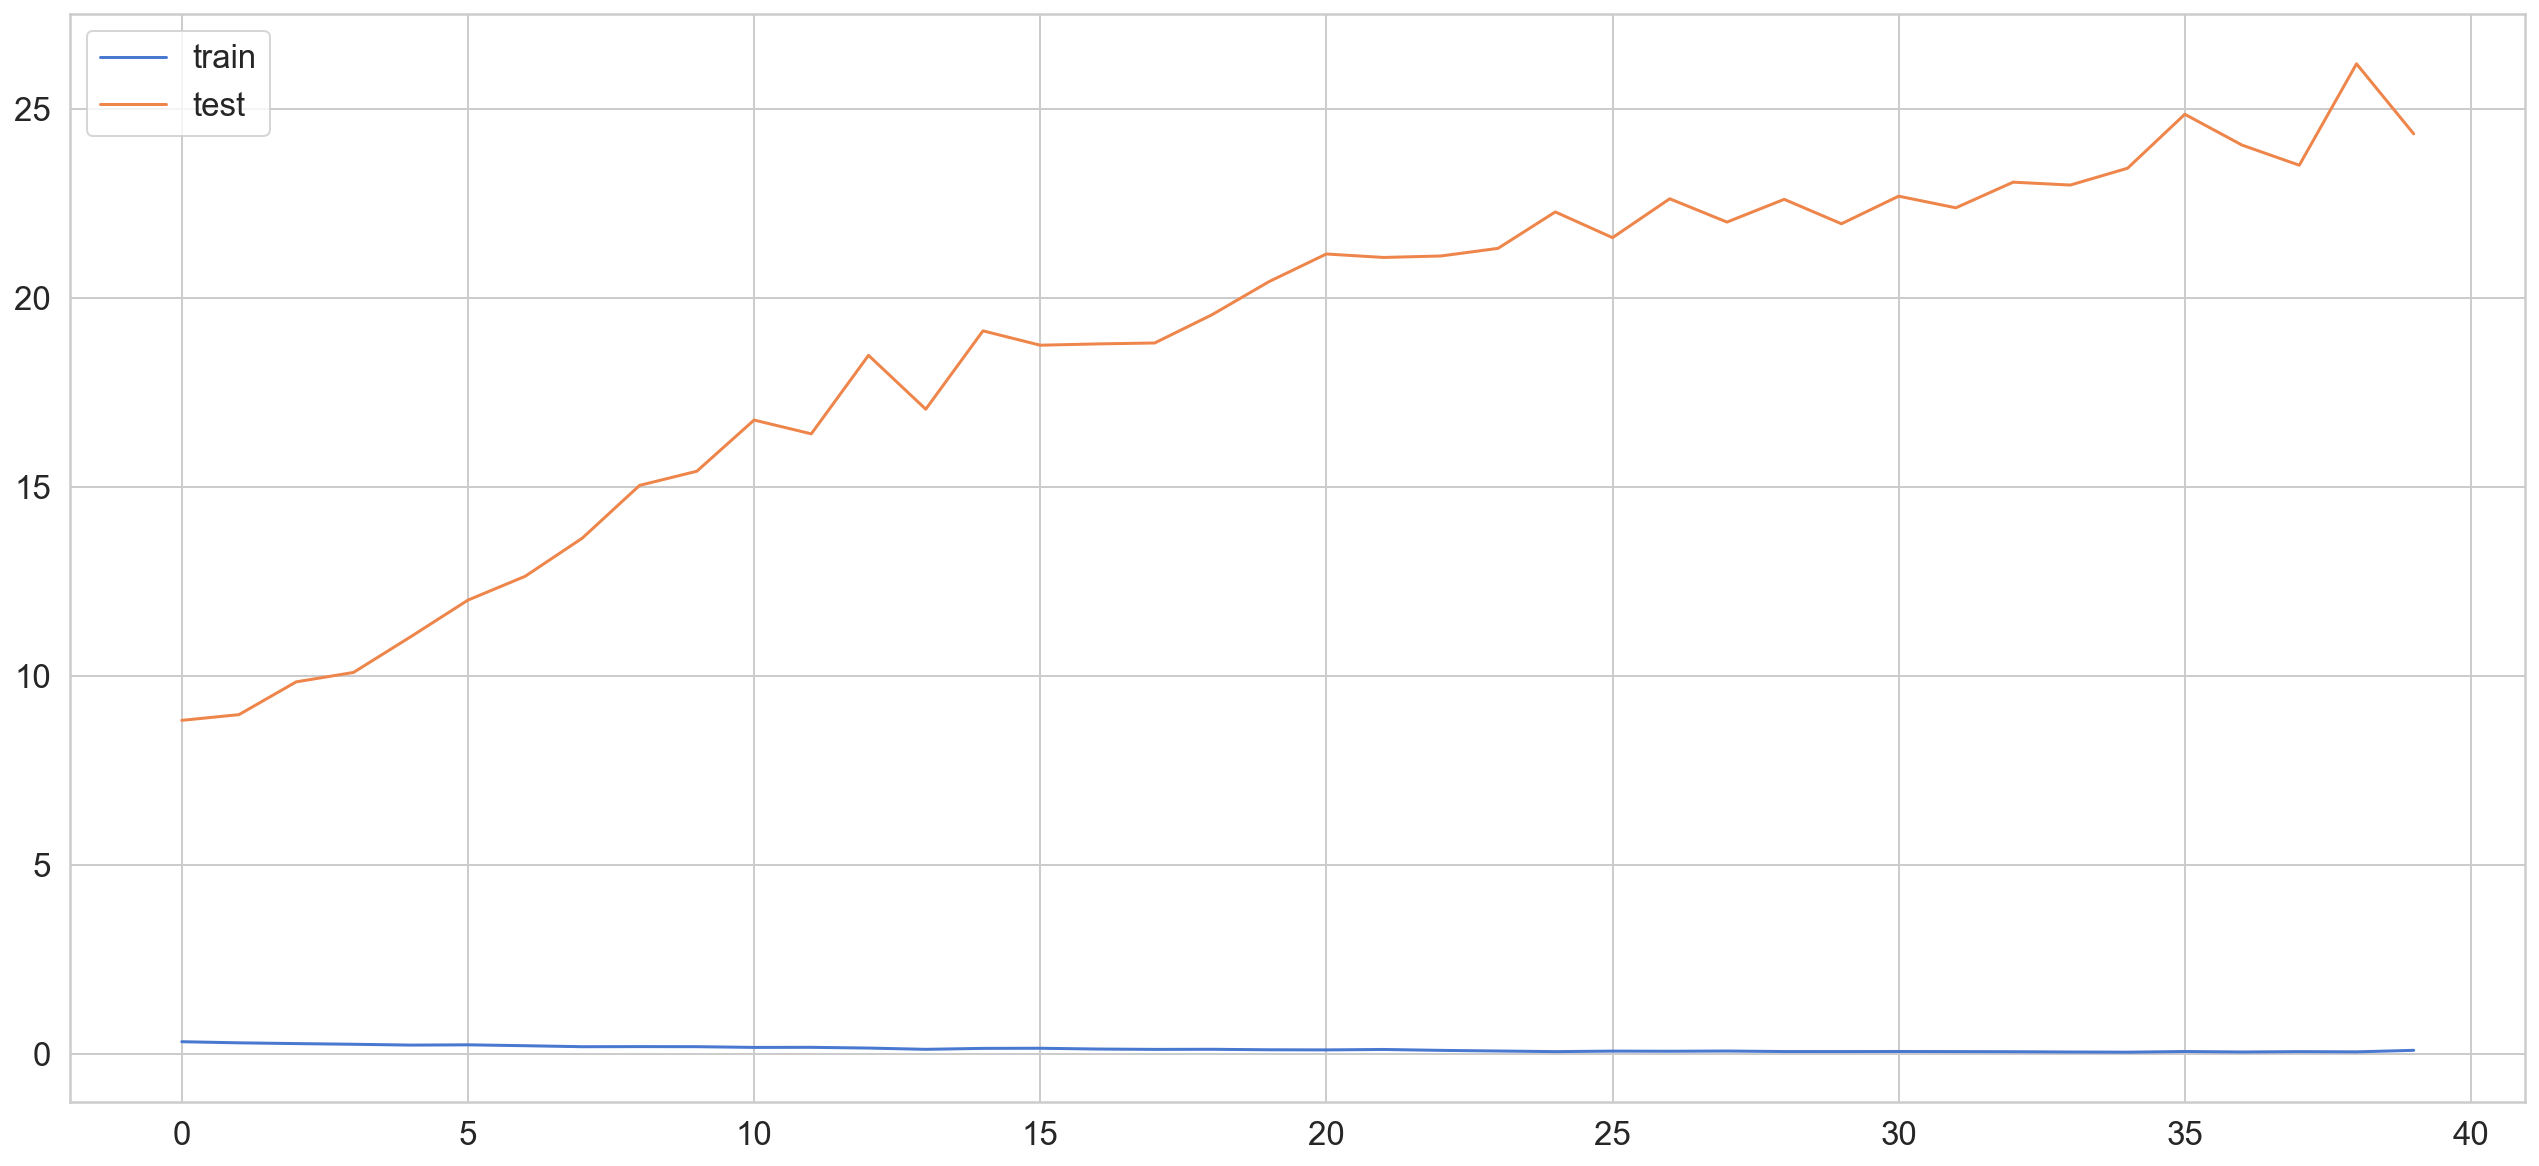

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [21]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 2.4899 - acc: 0.4545


[2.4898626804351807, 0.4545454680919647]

In [22]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 1s 677ms/step


array([[1.6504528e-02, 1.0889267e-03, 5.9183741e-01, 2.6835559e-02,
        3.1601841e-04, 3.6341757e-01],
       [3.4452016e-06, 8.5631709e-06, 3.7574965e-01, 5.6262946e-01,
        1.0959317e-05, 6.1597943e-02],
       [5.6341582e-07, 8.6137479e-09, 1.6135640e-03, 1.6287941e-02,
        3.4377976e-07, 9.8209757e-01],
       [7.8786914e-11, 1.2530658e-07, 1.1560117e-02, 9.8743045e-01,
        3.4120724e-08, 1.0092148e-03],
       [2.1655670e-10, 5.2051587e-07, 1.2892283e-01, 8.6873829e-01,
        4.2627398e-08, 2.3383433e-03],
       [7.4043033e-10, 4.8130920e-07, 7.5755608e-01, 2.3822924e-01,
        2.3312344e-08, 4.2141769e-03],
       [6.6451311e-09, 1.0734890e-07, 4.9274707e-01, 4.8601022e-01,
        5.1769934e-08, 2.1242555e-02],
       [5.4812932e-07, 1.1999695e-07, 4.2190664e-02, 1.6442941e-01,
        2.0335840e-06, 7.9337710e-01],
       [3.0003193e-08, 3.4368122e-09, 3.0562459e-03, 3.7401602e-01,
        2.6420105e-07, 6.2292737e-01],
       [4.0203162e-08, 3.5660157e-09,

In [23]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=5),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

In [64]:
trainPredict = scaler.inverse_transform(y_pred)

ValueError: operands could not be broadcast together with shapes (11,5) (3,) (11,5) 

In [1]:
text = "A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.The bunch hung from a high branch, and the Fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain. Now he sat down and looked at the grapes in disgust. 'What a fool I am,' he said. 'Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for.'And off he walked very, very scornfully. There are many who pretend to despise and belittle that which is beyond their reach."

char_counts = {}

for char in text:
    if char in char_counts:
        char_counts[char] += 1
    else:
        char_counts[char] = 1

for char, count in char_counts.items():
    print(f"'{char}': {count}")

'A': 3
' ': 152
'F': 3
'o': 43
'x': 3
'n': 41
'e': 68
'd': 28
'a': 57
'y': 12
's': 26
'p': 12
'i': 33
'b': 11
'u': 17
't': 46
'f': 17
'l': 18
'c': 11
'h': 40
'r': 35
'g': 21
'm': 14
'v': 4
'.': 11
'T': 4
'w': 11
'j': 3
',': 6
''': 5
'z': 1
'S': 1
'k': 4
'N': 1
'W': 1
'I': 2
'H': 1


In [4]:
import heapq
from collections import defaultdict

def calculate_freq(text):
    frequency = defaultdict(int)
    for char in text:
        frequency[char] += 1
    return frequency

def huffman_tree(frequency):
    heap = [[weight, [char, ""]] for char, weight in frequency.items()]
    heapq.heapify(heap)
    
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
    
def huffman_encoding(huff_tree):
    huff_dict = {}
    for char, code in huff_tree:
        huff_dict[char] = code
    return huff_dict

def compression_ratio(text, huff_dict):
    total_chars = len(text) * 8
    compressed_chars = sum(len(huff_dict[char]) for char in text)
    return (1-compressed_chars / total_chars)*100

text = "A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.The bunch hung from a high branch, and the Fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain. Now he sat down and looked at the grapes in disgust. 'What a fool I am,' he said. 'Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for.'And off he walked very, very scornfully. There are many who pretend to despise and belittle that which is beyond their reach."

frequency = calculate_freq(text)
huff_tree = huffman_tree(frequency)
huff_dict = huffman_encoding(huff_tree)
ratio = compression_ratio(text, huff_dict)

print("Compression ratio:", ratio)

Compression ratio: 45.72454308093995


In [1]:
import heapq
from collections import defaultdict

def calculate_frequency(text):
    frequency = defaultdict(int)
    for character in text:
        frequency[character] += 1
    return frequency

def build_huffman_tree(frequency):
    heap = [[weight, [char, ""]] for char, weight in frequency.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

def huffman_encoding(text):
    frequency = calculate_frequency(text)
    huffman_tree = build_huffman_tree(frequency)
    print("Huffman Tree:")
    for char, encoding in huffman_tree:
        print(f"{char}: {encoding}")

    original_bits = len(text) * 8
    compressed_bits = sum(frequency[char] * len(encoding) for char, encoding in huffman_tree)
    compression_ratio = compressed_bits / original_bits

    print(f"\nCompression Ratio: {compression_ratio}")

# Test
text = "A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them."
huffman_encoding(text)

Huffman Tree:
 : 00
e: 011
a: 1101
n: 0101
t: 1000
d: 10101
g: 10111
h: 11101
i: 11100
o: 11110
r: 11111
s: 11001
u: 10010
b: 101001
c: 010010
f: 101100
l: 101101
m: 110000
p: 110001
w: 010000
x: 010001
y: 010011
.: 1001110
F: 1010000
z: 1001100
': 10011010
,: 10011011
A: 10011110
T: 10011111
j: 10100010
v: 10100011

Compression Ratio: 0.5373831775700935


In [3]:
def viterbi_decode(coded_bits, transition_table, output_table):
    num_states = len(transition_table)
    num_bits = len(coded_bits) // 2

    # Initialize the trellis and traceback structures.
    trellis = [[(-1, -1)] * num_states for _ in range(num_bits+1)]
    trellis[0][0] = (0, 0)  # The starting state has a path with a cost of zero.

    # Decode the bits.
    for i in range(num_bits):
        for current_state in range(num_states):
            for bit in [0, 1]:
                next_state = transition_table[current_state][bit]
                output_bits = output_table[current_state][bit]

                cost = sum(b1 != int(b2) for b1, b2 in zip(coded_bits[2*i:2*(i+1)], output_bits))

                if trellis[i+1][next_state][0] == -1 or trellis[i][current_state][0] + cost < trellis[i+1][next_state][0]:
                    trellis[i+1][next_state] = (trellis[i][current_state][0] + cost, current_state)

    # Backtrace the path with the minimum cost.
    path = []
    current_state = min(range(num_states), key=lambda state: trellis[-1][state][0])
    for i in range(num_bits, 0, -1):
        path.append(current_state)
        current_state = trellis[i][current_state][1]
    path.append(current_state)

    path.reverse()
    return path

# Define the transition and output tables.
transition_table = [[0, 2], [0, 2], [1, 3], [1, 3]]
output_table = [['00', '11'], ['11', '00'], ['10', '01'], ['01', '10']]

# Decode the sequence.
coded_bits = '001011'
decoded_path = viterbi_decode(coded_bits, transition_table, output_table)

# The result is a path through the state trellis.
print('Decoded path: {}'.format(decoded_path))

# The decoded bits are the inputs that lead to each state transition.
decoded_bits = [transition_table[state].index(next_state) for state, next_state in zip(decoded_path[:-1], decoded_path[1:])]

print('Decoded bits: {}'.format(decoded_bits))

Decoded path: [1, 0, 0, 0]
Decoded bits: [0, 0, 0]


In [4]:
def compute_crc(data, div, code='000'):
    """Compute the CRC checksum."""
    # Append the code to the data.
    data += code

    # Convert the data and divisor to binary strings.
    data = [int(b) for b in data]
    div = [int(b) for b in div]

    for i in range(len(data) - len(code)):
        if data[i] != 0:
            for j in range(len(div)):
                data[i+j] = data[i+j] ^ div[j]

    return ''.join([str(b) for b in data[-len(code):]])

data = '1011'
div = '1001'

# Compute the checksum.
checksum = compute_crc(data, div)

# Print the original data and checksum.
print('Original data: {}'.format(data))
print('Checksum: {}'.format(checksum))

# Compute the checksum of the received data.
received_data = data + checksum
received_checksum = compute_crc(received_data, div)

print('Received data: {}'.format(received_data))
print('Received checksum: {}'.format(received_checksum))

# If the checksum is all zeros, then no error was detected.
if received_checksum == '000':
    print('No error detected.')
else:
    print('Error detected.')

Original data: 1011
Checksum: 010
Received data: 1011010
Received checksum: 000
No error detected.


In [6]:
from ecdsa import SigningKey, NIST384p

# Create a new signing key.
sk = SigningKey.generate(curve=NIST384p)
vk = sk.get_verifying_key()

message = b"Hello World!"

# Sign the message.
signature = sk.sign(message)

# Verify the signature.
assert vk.verify(signature, message)

print("Signature is valid!")

Signature is valid!


In [19]:
from reedsolo import RSCodec

# Instantiate RSCodec object with error correction capability of 5 bytes
rs = RSCodec(10)

# Message to encode
message = b'Hello World!'

# Encode the message
encoded = rs.encode(message)

# Introduce some errors, not exceeding the error correction capability
encoded[0] = 0  # change the value at position 0
encoded[1] = 0  # change the value at position 1
encoded[2] = 0  # change the value at position 2

# Decode and correct errors
decoded = rs.decode(encoded)

print(decoded)

(bytearray(b'Hello World!'), bytearray(b'Hello World!\xbc\xbd}t\x83\xb5\xa4\x1b\xccL'), bytearray(b'\x02\x01\x00'))
